# Twin4Build: Basic Usage Example

Welcome to this tutorial on using the Twin4Build package! In this notebook, you'll learn how to:
1. Create a simple model with a schedule and a damper
2. Connect components in the model
3. Simulate the model
4. Visualize the results

Let's get started!

## 1. Setup
First, let's install and import the necessary packages:

In [1]:
#%pip install git+https://github.com/JBjoernskov/Twin4Build.git
###
import sys
file_path = r"C:\Users\jabj\Documents\python\Twin4Build"
sys.path.append(file_path)
###
import twin4build as tb
import datetime
from dateutil import tz
import twin4build.utils.plot.plot as plot

## 2. Creating the Model

In this example, we will use the one_room_example_model.xlsm file. 
This file contains a model of a single room with a schedule and a damper.
We use the translation engine to automatically create the components and connections.
The validation at the end fails, because 


In [2]:
import twin4build.examples.utils as utils
# Create a new model
model = tb.Model(id="mymodel")
filename = utils.get_path("one_room_example_model.xlsm")
model.load(semantic_model_filename=filename)


C:\Users\jabj\Documents\python\Twin4Build\twin4build\utils\get_main_dir.py:16: UserWarning: Could not determine main module path, using temp dir: C:\Users\jabj\AppData\Local\Temp\1
  warnings.warn("Could not determine main module path, using temp dir: %s" % d)



Loading model...
   |___Reading semantic model...done
   |___Drawing input object graph...done
   |___Parsing semantic model...done
   |___Drawing parsed object graph...done
   |___Connecting components...done
   |___Drawing system graph...done
   |___Removing cycles...done
   |___Drawing system graph without cycles...done
   |___Determining execution order...done
   |___Creating execution graph...done
   |___Drawing execution graph...done
   |___Loading parameters...done
   |___Validating model...
        |___The component with class "BuildingSpace0AdjBoundaryOutdoorFMUSystem" and id "[020B][020B_space_heater]" has no value for the parameter(s):...
        |   C_supply
        |   C_wall
        |   C_air
        |   C_boundary
        |   R_out
        |   R_in
        |   R_boundary
        |   f_wall
        |   f_air
        |   Q_occ_gain
        |   CO2_occ_gain
        |   CO2_start
        |   fraRad_sh
        |   Q_flow_nominal_sh
        |   T_a_nominal_sh
        |   T_b_

We see that the model is missing an input "supplyWaterTemperature".
Let's add it and validate again.

In [3]:
def fcn(self):
    supply_water_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 60,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="supply_water_schedule"
    )
    model.add_connection(supply_water_schedule, self.component_dict["[020B][020B_space_heater]"], "scheduleValue", "supplyWaterTemperature")

model.load(semantic_model_filename=filename, fcn=fcn, verbose=False)


Loading model...
   |___Reading semantic model...done
   |___Drawing input object graph...done
   |___Parsing semantic model...done
   |___Drawing parsed object graph...done
   |___Connecting components...done
   |___Applying user defined function...done
   |___Drawing system graph...done
   |___Removing cycles...done
   |___Drawing system graph without cycles...done
   |___Determining execution order...done
   |___Creating execution graph...done
   |___Drawing execution graph...done
   |___Loading parameters...done
   |___Validating model...
        |___The component with class "BuildingSpace0AdjBoundaryOutdoorFMUSystem" and id "[020B][020B_space_heater]" has no value for the parameter(s):...
        |   C_supply
        |   C_wall
        |   C_air
        |   C_boundary
        |   R_out
        |   R_in
        |   R_boundary
        |   f_wall
        |   f_air
        |   Q_occ_gain
        |   CO2_occ_gain
        |   CO2_start
        |   fraRad_sh
        |   Q_flow_nominal_s

### Visualizing the Model (not required)
We can visualize the model to see the components and connections.<br>
This is not required, but it can be helpful for debugging and for building the model.<br>
The nodes in the graph represent components, and the edges represent connections between components as defined earlier.

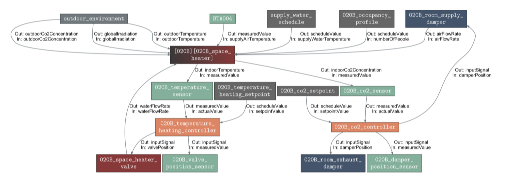

In [4]:
import matplotlib.pyplot as plt
import os
system_graph = os.path.join(model.graph_path, "system_graph.png")
image = plt.imread(system_graph)
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

## 2. Simulating the Model

Now that our model is set up, let's simulate it for a 2-day period.

In [5]:
# Set up the simulator and simulation parameters
simulator = tb.Simulator()
stepSize = 600  # Seconds
startTime = datetime.datetime(year=2024, month=1, day=10, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2024, month=1, day=12, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))

# Simulate the model
simulator.simulate(model,
                    stepSize=stepSize,
                    startTime=startTime,
                    endTime=endTime)
print("Simulation completed successfully!")

AssertionError: Parameter "m_flow_nominal" is None.

## Visualizing the Results

Finally, let's visualize the results of our simulation.

In [ ]:
# Plot the damper results
plot.plot_damper(model, simulator, "Damper", show=True)
print("Plot generated successfully!")

## Conclusion

Congratulations! You've successfully created a simple Twin4Build model, simulated it, and visualized the results. 

In this tutorial, you learned how to:
1. Create a model and add components (schedule and damper)
2. Connect components in the model
3. Set up and run a simulation
4. Visualize the simulation results

Next steps:
- Try adding more components to create more complex models
- Experiment with different schedules and parameter values
- Explore other visualization options in the `plot` module

For more advanced usage and detailed documentation, please refer to the Twin4Build documentation.